In [30]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.datasets import make_moons
import pandas as pd
import seaborn as sns

In [31]:
df1 = pd.DataFrame(pd.read_excel('F:\CI\Class\Data13.xlsx',nrows=1000))
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


In [32]:
df1['Style'] = df1['drivingStyle'].astype('category').cat.codes
df1['Congestion'] = df1['traffic'].astype('category').cat.codes
df1.head()

,VehicleSpeedAverage,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,IntakeAirTemperature,roadSurface,traffic,drivingStyle,Style,Congestion
0,13.637810,37,100,857,21,SmoothCondition,HighCongestionCondition,EvenPaceStyle,1,0
1,13.637810,37,100,857,21,SmoothCondition,HighCongestionCondition,EvenPaceStyle,1,0
2,13.605983,37,100,855,21,SmoothCondition,HighCongestionCondition,EvenPaceStyle,1,0
3,13.653724,37,100,858,20,SmoothCondition,HighCongestionCondition,EvenPaceStyle,1,0
4,13.653724,37,100,858,21,SmoothCondition,HighCongestionCondition,EvenPaceStyle,1,0


In [33]:
df = df1.drop('drivingStyle',axis=1).drop('roadSurface',axis=1).drop('traffic',axis=1)
#df = df1.drop('drivingStyle',axis=1)
df.head()

,VehicleSpeedAverage,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,IntakeAirTemperature,Style,Congestion
0,13.637810,37,100,857,21,1,0
1,13.637810,37,100,857,21,1,0
2,13.605983,37,100,855,21,1,0
3,13.653724,37,100,858,20,1,0
4,13.653724,37,100,858,21,1,0


In [34]:
#X= df.drop('Style',axis=1).drop('IntakeAirTemperature',axis=1).drop('EngineCoolantTemperature',axis=1)
X = df.drop('Style',axis=1).drop('Congestion',axis=1).drop('VehicleSpeedAverage',axis=1).drop('EngineCoolantTemperature',axis=1).drop('IntakeAirTemperature',axis=1)
y=df['Style']
print(X)
print(y)

C = 1.0 

     ManifoldAbsolutePressure  EngineRPM
0                         100        857
1                         100        857
2                         100        855
3                         100        858
4                         100        858
..                        ...        ...
995                       101       1121
996                       100       1123
997                       100        923
998                        99        861
999                        99        849

[1000 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Style, Length: 1000, dtype: int8


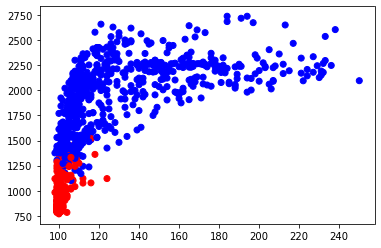

In [35]:
import matplotlib.pyplot as plt
X1 = X.to_numpy()
cols = ['b', 'r', 'g', 'm', 'c']
col = [cols[int(i)] for i in y]
plt.scatter(X1[:,0], X1[:,1], color=col)
plt.show()

In [36]:
# generate moon class dataset
#X, y = make_moons(n_samples=100, noise=0.1, random_state=0)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

trainX2, testX2, trainy2, testy2 = trainX, testX, trainy, testy
trainX3, testX3, trainy3, testy3 = trainX, testX, trainy, testy
trainX4, testX4, trainy4, testy4 = trainX, testX, trainy, testy
print('Done')

Done


In [37]:
# packages to import
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.metrics import roc_curve, auc

# Run classifier
classifier1 = svm.SVC(kernel='linear', probability=True)
probas_1 = classifier1.fit(trainX, trainy).predict_proba(testX)
y_predict1 = classifier1.predict(testX)

classifier2 = svm.SVC(kernel='rbf', probability=True)
probas_2 = classifier2.fit(trainX2, trainy2).predict_proba(testX2)
y_predict2 = classifier2.predict(testX2)

classifier3 = svm.SVC(kernel='poly', probability=True)
probas_3 = classifier3.fit(trainX3, trainy3).predict_proba(testX3)
y_predict3 = classifier3.predict(testX3)

classifier4 = svm.SVC(kernel='sigmoid', probability=True)
probas_4 = classifier4.fit(trainX4, trainy4).predict_proba(testX4)
y_predict4 = classifier4.predict(testX4)

print('Done')

Done


In [19]:
# packages to import
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.metrics import roc_curve, auc

# Run classifier
classifier11 = svm.SVC(kernel='poly', C=C)
classifier11.fit(X,y)

SVC(kernel='poly')

In [38]:
X1.shape

(1000, 2)

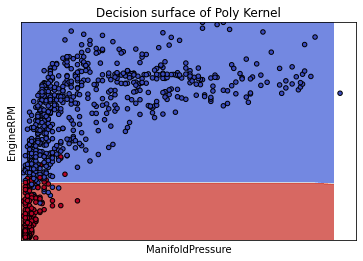

In [39]:
def make_meshgrid(x, y, h=10):
    x_min, x_max = x.min() -1, x.max() + 1
    y_min, y_max = y.min()- 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy,**params):
    Z = classifier11.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z,**params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Poly Kernel')
# Set-up grid for plotting.
X0, X2 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X2)

plot_contours(ax, classifier11, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("EngineRPM")
ax.set_xlabel("ManifoldPressure")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
cm = np.array(confusion_matrix(testy, y_predict1))
confusion = pd.DataFrame(cm)
print(confusion)

cm2 = np.array(confusion_matrix(testy2, y_predict2))
confusion2 = pd.DataFrame(cm2)
print(confusion2)

cm3 = np.array(confusion_matrix(testy3, y_predict3))
confusion3 = pd.DataFrame(cm3)

cm4 = np.array(confusion_matrix(testy4, y_predict4))
confusion4 = pd.DataFrame(cm4)

     0    1
0  308    5
1    8  179
     0    1
0  308    5
1   10  177


In [42]:
print(classification_report(testy, y_predict1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       313
           1       0.97      0.96      0.96       187

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [43]:
total=sum(sum(cm))

In [44]:
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Accuracy :  0.974
Sensitivity :  0.9572192513368984
Specificity :  0.9840255591054313


In [46]:
# Compute ROC curve and area the curve

fpr, tpr, thresholds = roc_curve(testy, probas_1[:, 1])
roc_auc = auc(fpr, tpr)
print('Linear Kernel Roc',roc_auc)

fpr2, tpr2, thresholds2 = roc_curve(testy2, probas_2[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)

fpr3, tpr3, thresholds3 = roc_curve(testy3, probas_3[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)

fpr4, tpr4, thresholds4 = roc_curve(testy4, probas_4[:, 1])
roc_auc4 = auc(fpr4, tpr4)
print(roc_auc4)

Linear Kernel Roc 0.9976593599972664
0.9977106148878372
0.997719157369599
0.9977106148878372


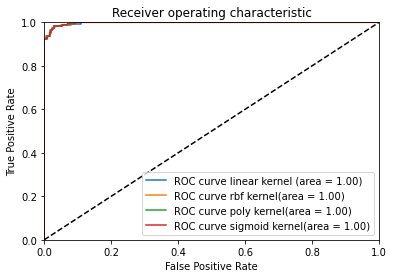

In [68]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve linear kernel (area = %0.2f)' % roc_auc)
pl.plot(fpr2, tpr2, label='ROC curve rbf kernel(area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='ROC curve poly kernel(area = %0.2f)' % roc_auc3)
pl.plot(fpr4, tpr4, label='ROC curve sigmoid kernel(area = %0.2f)' % roc_auc4)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

Average precision-recall score: 1.00


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

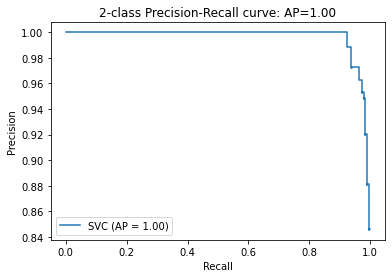

In [69]:
y_score = classifier1.decision_function(testX)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(testy, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier1, testX, testy)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [7]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(trainX,trainy)

DecisionTreeClassifier()

In [8]:
X

,VehicleSpeedAverage,ManifoldAbsolutePressure,EngineRPM,Congestion
0,13.637810,100,857,0
1,13.637810,100,857,0
2,13.605983,100,855,0
3,13.653724,100,858,0
4,13.653724,100,858,0
...,...,...,...,...
995,17.838956,101,1121,0
996,17.870783,100,1123,0
997,14.688097,100,923,0
998,13.701464,99,861,0


In [9]:
X.columns

Index(['VehicleSpeedAverage', 'ManifoldAbsolutePressure', 'EngineRPM',
       'Congestion'],
      dtype='object')

In [10]:
#prediction
y_pred = clf.predict(testX)

In [12]:
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score

print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=trainy, y_pred=clf.predict(trainX)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=testy, y_pred=y_pred))

Accuracy Score on train data (using Default criterionas gini):  1.0
Accuracy Score on test data (using Default criterionas gini):  0.962


In [13]:
# After tune the parameters of the decision tree to increase its accuracy
clf2 = DecisionTreeClassifier( min_samples_split=50)
clf2.fit(trainX, trainy)


DecisionTreeClassifier(min_samples_split=50)

In [14]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
clf_entropy.fit(trainX, trainy)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

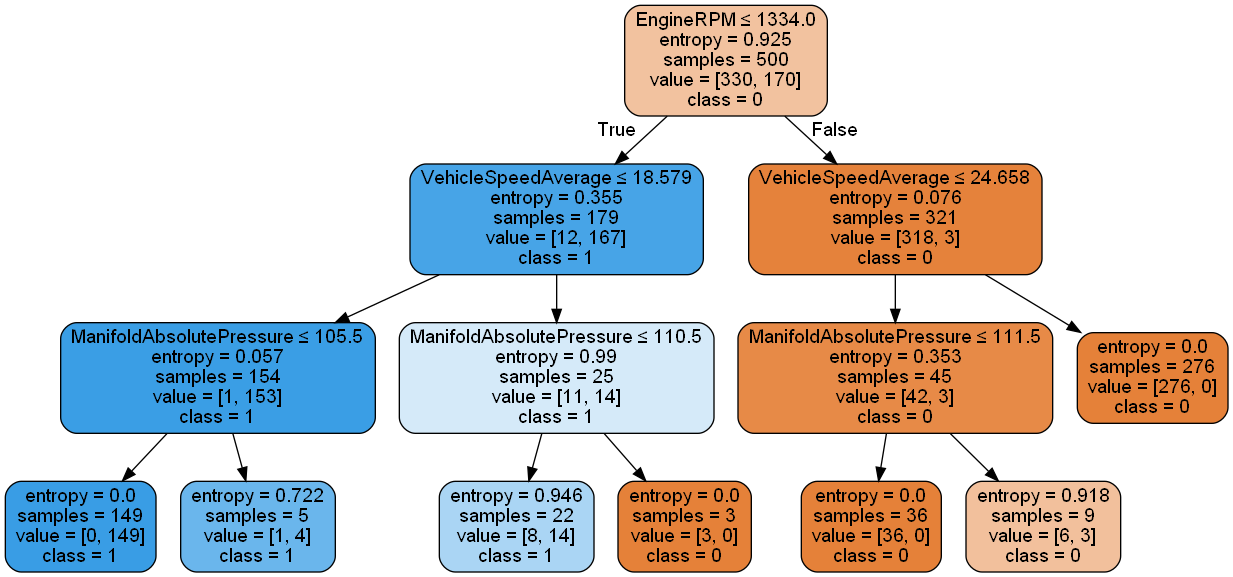

In [17]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

#feature_cols=['ManifoldAbsolutePressure','EngineRPM']
feature_cols=['VehicleSpeedAverage', 'ManifoldAbsolutePressure', 'EngineRPM',
       'Congestion']

dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,filled=True, rounded=True, special_characters=True,feature_names = feature_cols ,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())